# Visualization of Earnings based on College Majors 
Data of Recent Graduates of 172 Majors

Source: FiveThirtyEight Data

# Importing libraries and data and reading into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
df.shape  #Dimensions of Data

(173, 21)

In [3]:
len(df['Major'].unique())  #Number of Majors 

173

In [4]:
#So Major is unique in the dataset. Each row represents the data for each major

In [5]:
df.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [6]:
df.isnull().sum()  #Checking for missing values

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

Only one missing value in Total, Men,Women, ShareWomen, so that row can be deleted

In [70]:
df.dropna(subset=['Total','Men','Women','ShareWomen'],axis=0,inplace=True)
df.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [145]:
df.shape

(172, 21)

Checking if the datatypes of columns are appropriate with the data stored

In [72]:
df.dtypes      

Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object

In [73]:
df['Major_category'].unique()      #Number of Major Categories available

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [14]:
df.describe()             #Describing the statstical attributes of data

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


As major is unique in the dataset and each row corresponds to unique major, Major column can be made an index to the table

In [75]:
df.index  # As rank is already index to the table , we can make a new dataframe with major index rather than in the old dataframe

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            163, 164, 165, 166, 167, 168, 169, 170, 171, 172],
           dtype='int64', length=172)

In [76]:
df_by_major=df.set_index('Major')
df_by_major.head()

,Rank,Major_code,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major,,,,,,,,,,,,,,,,,,,,
PETROLEUM ENGINEERING,1,2419,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
MINING AND MINERAL ENGINEERING,2,2416,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
METALLURGICAL ENGINEERING,3,2415,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,2417,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
CHEMICAL ENGINEERING,5,2405,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Top Five Majors of Men and Women Majority

In [78]:
top_men=df_by_major.sort_values('Men',ascending=False)['Men']
top_women=df_by_major.sort_values('Women',ascending=False)['Women']

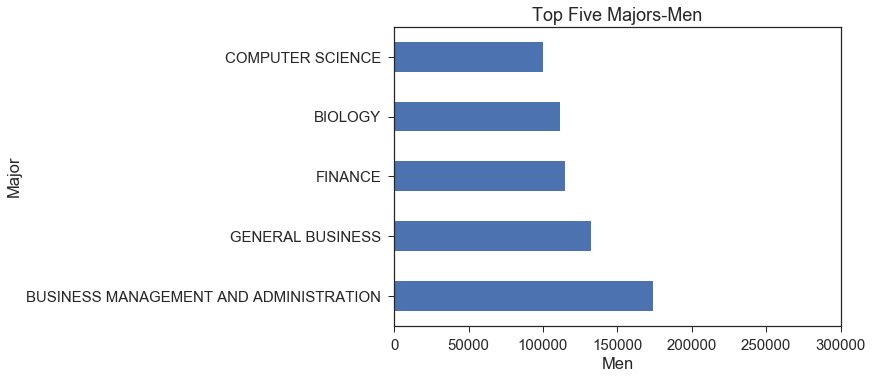

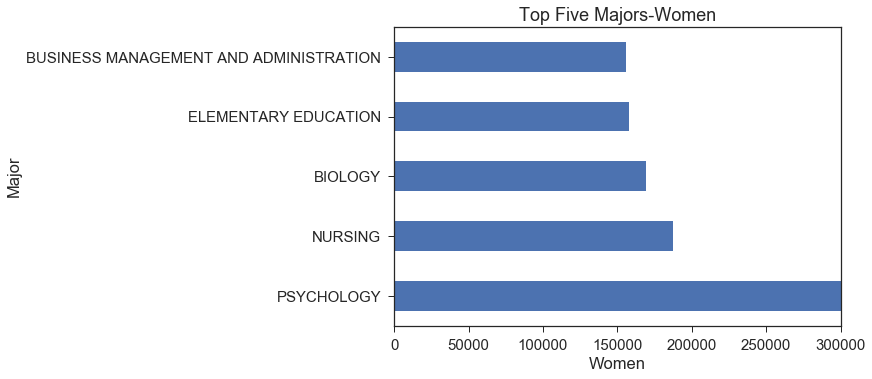

In [85]:
top_men.head().plot(kind='barh')
plt.xlabel('Men')
plt.xlim(0,300000)
plt.title('Top Five Majors-Men')
plt.show()
top_women.head().plot(kind='barh')
plt.xlabel('Women')
plt.title('Top Five Majors-Women')
plt.xlim(0,300000)
plt.show()

# Lowest Five Majors of Men and Women Majority

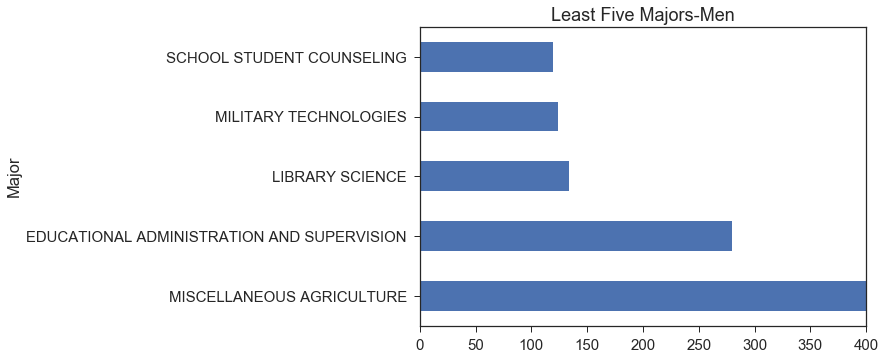

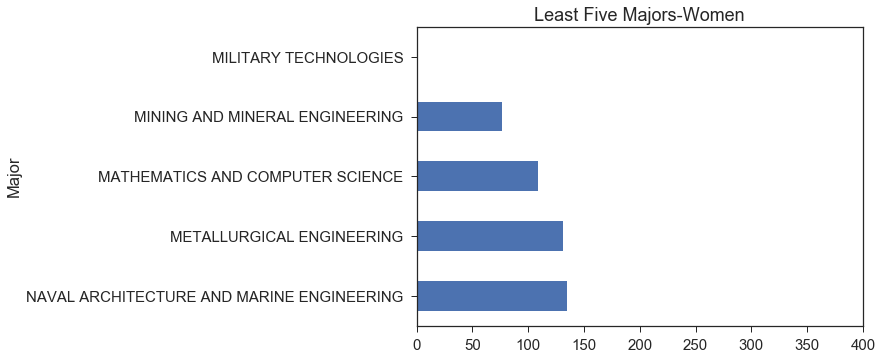

In [86]:
top_men[-5:].plot(kind='barh')
plt.xlim(0,400)
plt.title('Least Five Majors-Men')
plt.show()
top_women.tail().plot(kind='barh')
plt.xlim(0,400)
plt.title('Least Five Majors-Women')
plt.show()

Analyzing the top Five Majors of Men and Women, Men are more into General Business, Finance and Computer Science while Women are
more into Nursing,Pyschology and Elementary Education.

Business Management and Adminstration and Biology has good share of both men and women.

Another observation is the top five majors have more amount of Women than the amount of Men in the top five Majors while the least five majors have more number of men than the number of women in its last five majors.

#  Do students in popular majors make more money?

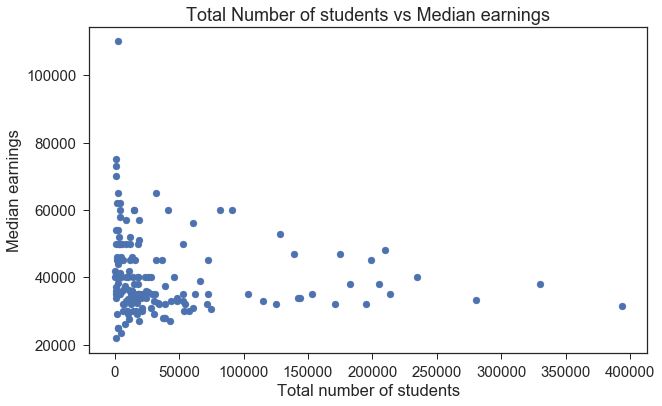

In [89]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df['Total'],df['Median'])
plt.xlabel('Total number of students')
plt.ylabel('Median earnings')
plt.title('Total Number of students vs Median earnings');

In [90]:
df['Total'].corr(df['Median'])

-0.10673767020513721

The scatter plot and correlation shows there is a negative correlation between Total Number of students and Median earnings of 
that major. And also the corr coffecient is close to zero which specifies the two variables are not much related.

# How many majors are predominantly male? Predominantly female?

In [91]:
df[df['Men']>df['Women']]['Major'].count()      #The number of majors Men are more than Women

76

In [92]:
df[df['Women']>df['Men']]['Major'].count()      #The number of majors Women are more than Men

96

# Distribution of students in each Major Category

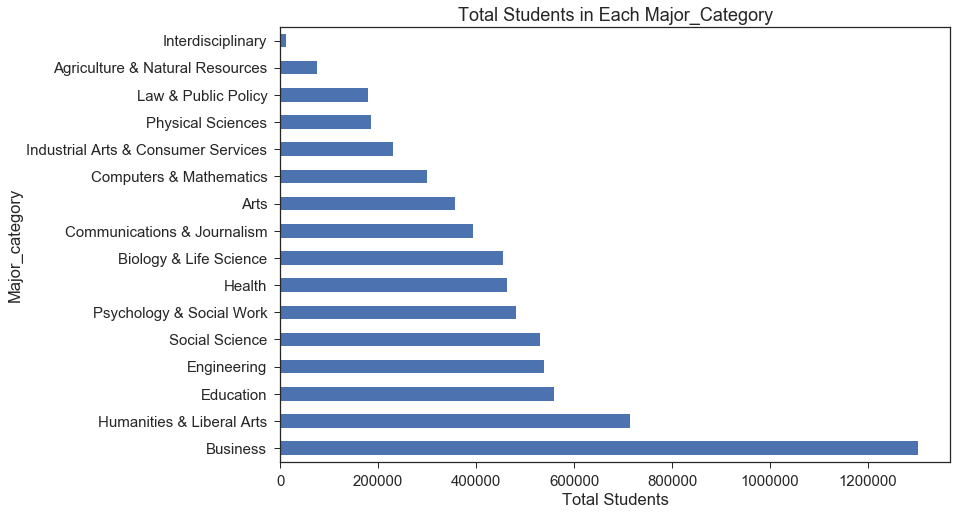

In [97]:
Total_Major_cats=df.groupby('Major_category')['Total'].sum()
fig=plt.figure(figsize=(12,8))
Total_Major_cats.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Students')
plt.title("Total Students in Each Major_Category")
plt.show()

In [98]:
df.corr()          #Correlation between all variables

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.097195,0.071137,-0.094780,0.174913,0.643781,0.004590,0.066941,0.030748,0.190272,0.016402,0.086736,0.076671,-0.872303,-0.737419,-0.800817,0.048950,0.141661,0.200360
Major_code,0.097195,1.000000,0.196784,0.179299,0.181459,0.259211,0.203375,0.197345,0.195857,0.191798,0.202203,0.220472,0.137163,-0.167237,-0.165593,-0.083655,0.036486,0.229562,0.222541
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.004590,0.203375,0.945575,0.875176,0.862606,0.097496,1.000000,0.964406,0.978362,0.824544,0.985212,0.917934,0.062955,-0.064475,-0.024429,-0.052256,0.701231,0.915335,0.860116
Employed,0.066941,0.197345,0.996214,0.870605,0.944037,0.147547,0.964406,1.000000,0.995831,0.934418,0.991031,0.968855,0.071374,-0.104399,-0.066706,-0.083996,0.797193,0.941236,0.927122
Full_time,0.030748,0.195857,0.989339,0.893563,0.917681,0.120200,0.978362,0.995831,1.000000,0.900711,0.998200,0.960042,0.066616,-0.079031,-0.042131,-0.061429,0.772135,0.933021,0.904714
Part_time,0.190272,0.191798,0.950268,0.751592,0.954513,0.212290,0.824544,0.934418,0.900711,1.000000,0.880656,0.945009,0.112247,-0.187516,-0.152827,-0.155224,0.804673,0.909495,0.951525


# Comparison of Men and Women population with Median Salary

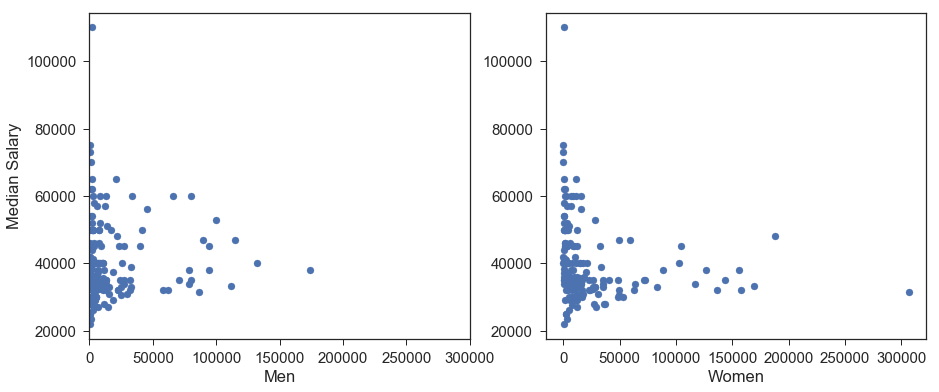

In [110]:
fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(121)
ax1.scatter(df['Men'],df['Median'])
ax2=fig.add_subplot(122)
ax2.scatter(df['Women'],df['Median'])
ax1.set_xlim(0,300000)
ax1.set_xlabel('Men')
ax1.set_ylabel('Median Salary')
ax2.set_xlabel('Women')
plt.show()

Median earnings increase slightly with Men population while decreases slightly with Women population

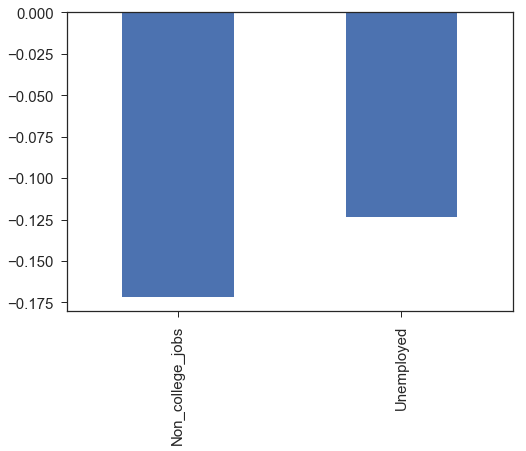

In [114]:
df.corr()['Median'][['Non_college_jobs','Unemployed']].plot.bar();

Relation of Median earnings with number of Unemployed and Non college jobs.
The corrrelation chart shows they are all negatively correlated with Median earnings.

# Plotting with Seaborn library

In [115]:
import seaborn as sns     #import seaborn library

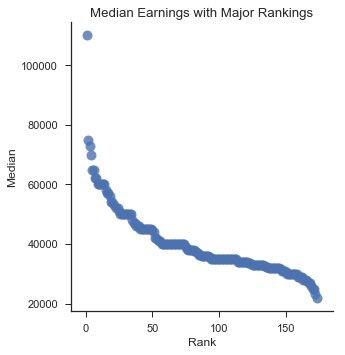

In [117]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# scatterplot 
sns.lmplot('Rank', 'Median',data=df,fit_reg=False, scatter_kws={"marker": "D","s": 100}) 
plt.title('Median Earnings with Major Rankings');

It shows that majors have been ranked based on median earnings!!

# Do students that majored in subjects that were majority female make more money?

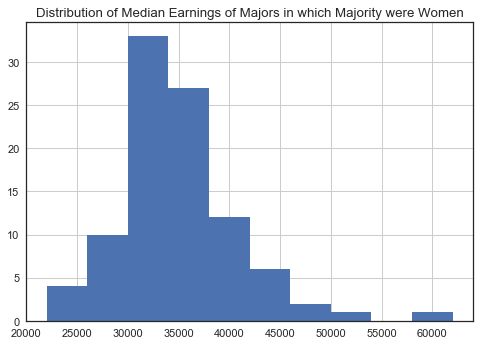

In [121]:
df_Women_Majority=df[df['Women']>df['Men']][['Major','Women','Median']]
df_Women_Majority['Median'].hist()
plt.title('Distribution of Median Earnings of Majors in which Majority were Women');

No, The median earnings of majority women Majors are more in the range of 30,000 to 40,000

# Relationship bewteen Full Time jobs and Median earnings

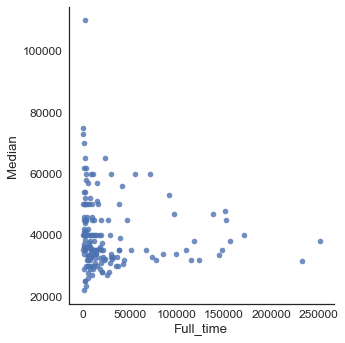

In [122]:
sns.set_context("paper", font_scale=1.5)
sns.lmplot('Full_time','Median',data=df,fit_reg=False); 

There is a small negative correlation between number of Full time jobs and Median salaries.
So the earnings are not necessarily from full time jobs but are also from non-college jobs and other sources.

# Distribution of Median salaries of all Majors

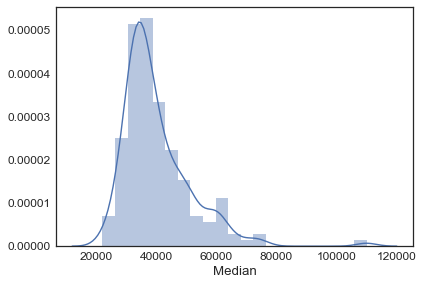

In [123]:
sns.distplot(df['Median']);

# Distribution and Relationship of Men and Women population with Full time jobs with scatter matrix

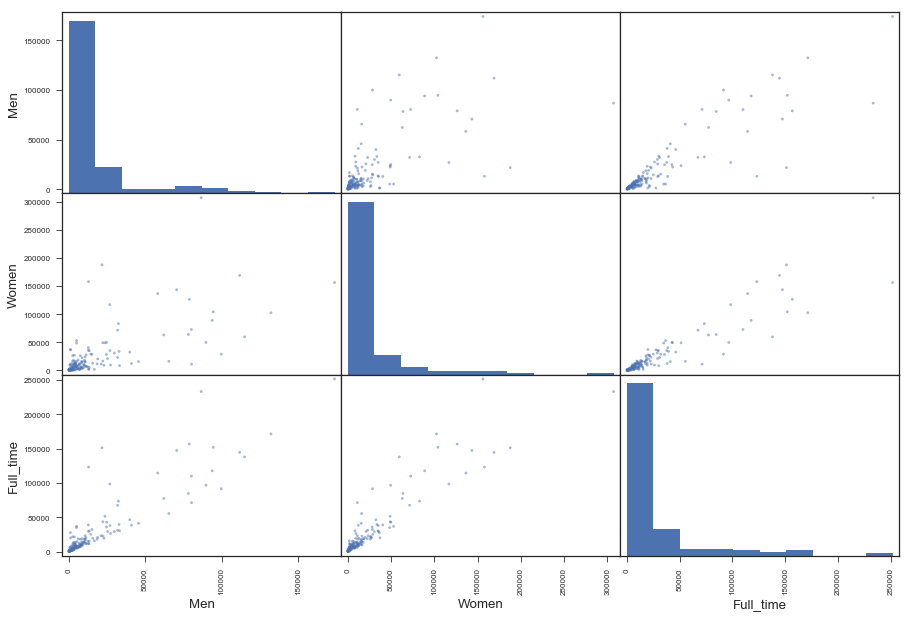

In [136]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df[['Men','Women','Full_time']], figsize=(15,10));

# Relationship of Share Women and Unemployment rate

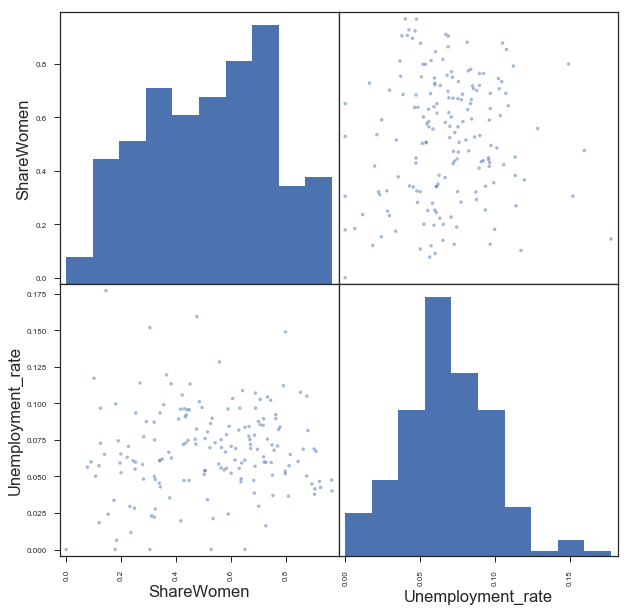

In [44]:
scatter_matrix(df[['ShareWomen','Unemployment_rate']], figsize=(10,10));

# How are non college jobs related with Median earnings

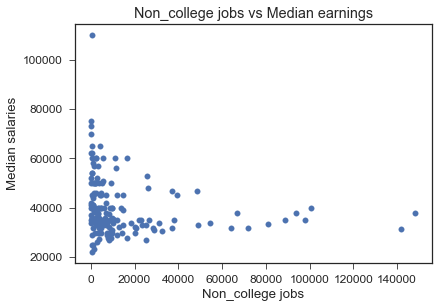

In [137]:
plt.scatter(df['Non_college_jobs'],df['Median'])
plt.title('Non_college jobs vs Median earnings')
plt.xlabel('Non_college jobs')
plt.ylabel('Median salaries');

# Percentage of ShareWomen in top ten and least ten paying Majors

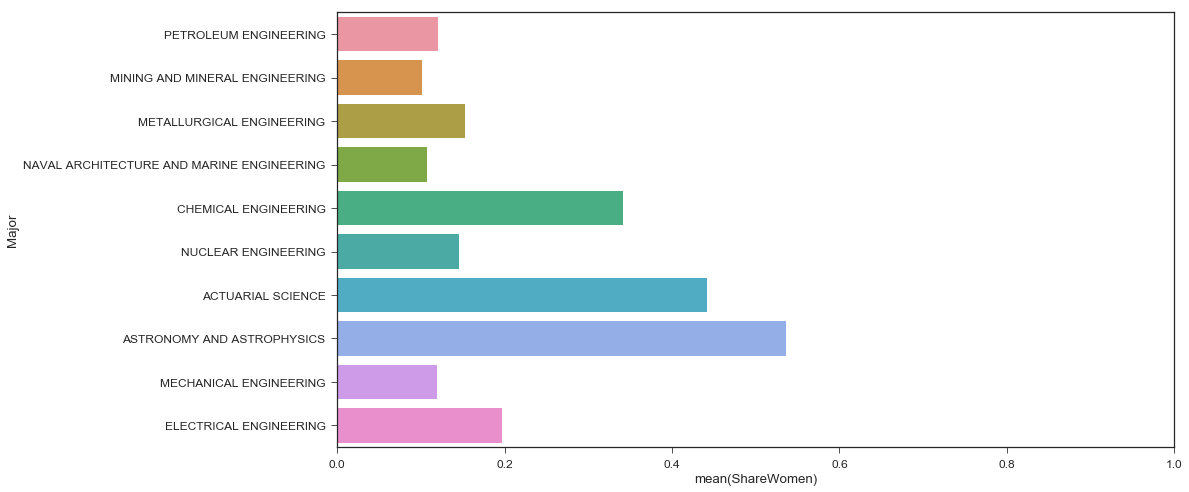

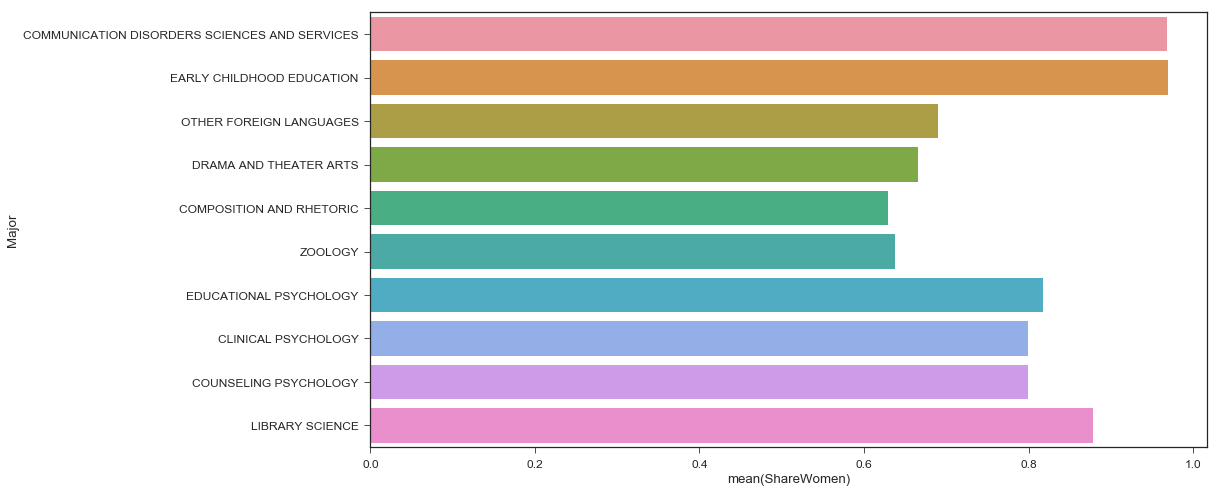

In [138]:
fig=plt.figure(figsize=(15,8))
ax=sns.barplot('ShareWomen','Major',data=df[:10],orient='h')
ax.set(xlim=(0.0,1.0))
plt.show()
fig1=plt.figure(figsize=(15,8))
ax1=sns.barplot('ShareWomen','Major',data=df[-10:])
plt.show()

From the figure it can be seen that percentage of ShareWomen is more in 10 lowest paying majors than 10 highest paying majors. 

# Unemployment rate in top ten and least ten paying majors

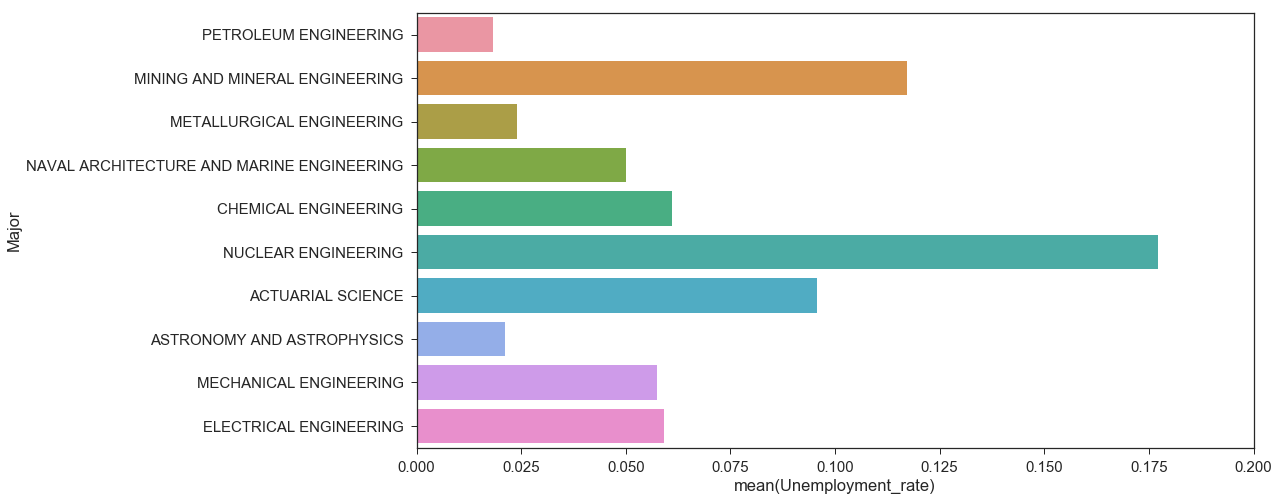

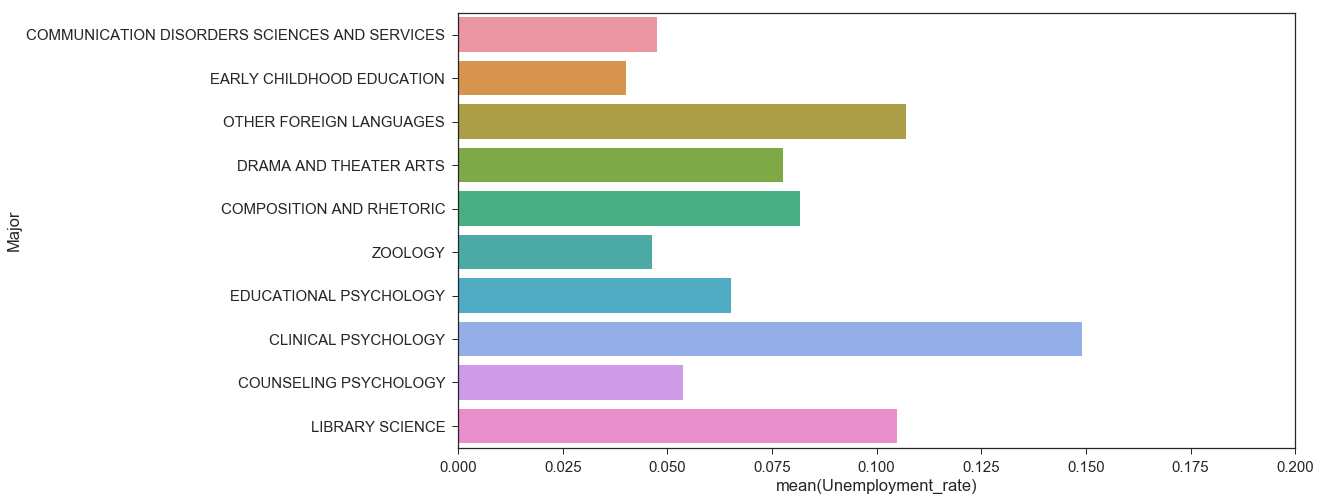

In [47]:
plt.figure(figsize=(15,8))
ax=sns.barplot('Unemployment_rate','Major',data=df[:10],orient='h')
ax.set(xlim=(0.0,0.2))
plt.show()
plt.figure(figsize=(15,8))
ax1=sns.barplot('Unemployment_rate','Major',data=df[-10:],orient='h')
ax1.set(xlim=(0.0,0.2))
plt.show()

Unemployment rate is almost same in 10 highest paying majors and also 10 lowest paying majors.
Rank of Median earnings majors does not infuence the unemployment rate much.

# Exploring the distribution of men and women in each major category

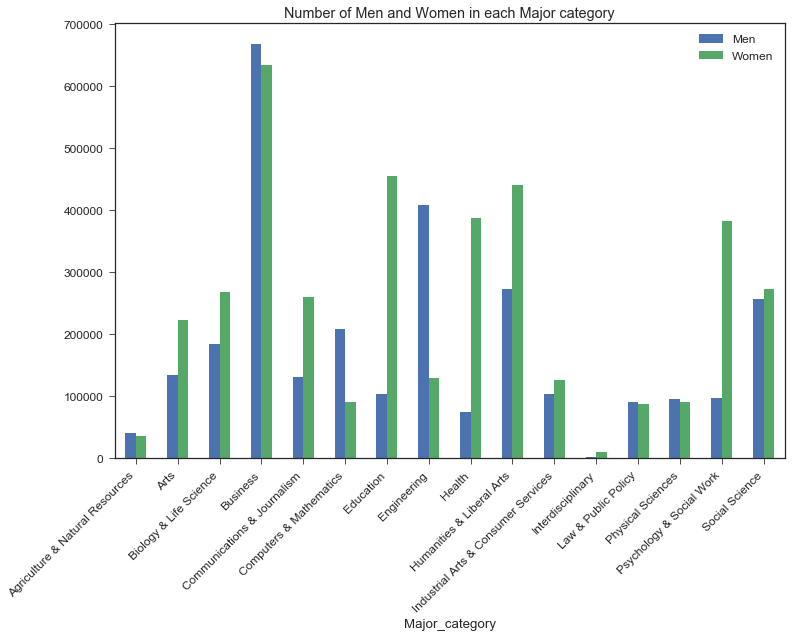

In [154]:
df_by_Major_category=df.groupby('Major_category')[['Men','Women']].sum()
ax=df_by_Major_category[['Men','Women']].plot(kind='bar',figsize=(12,8))
ax.set_xticklabels(df_by_Major_category.index, rotation=45,ha='right')
plt.title('Number of Men and Women in each Major category')
plt.show();

# Explore the distribution of Unemployment rate with boxplot

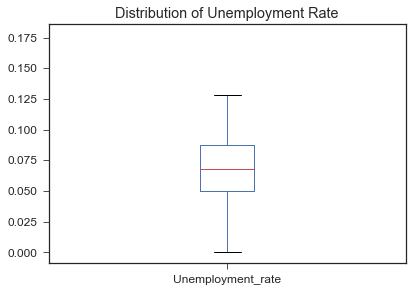

In [143]:
ax=df['Unemployment_rate'].plot(kind='box')
ax.set_title("Distribution of Unemployment Rate");

# Hexagonal bin plot of Median earnings with unemployment rate

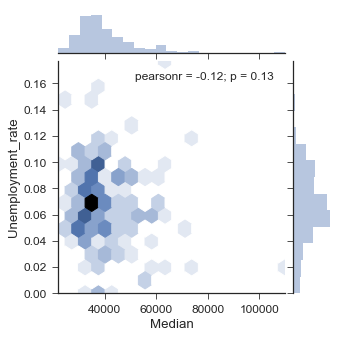

In [144]:
g = sns.jointplot("Median", "Unemployment_rate", data=df, kind="hex")